In [277]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from pylab import rcParams
import sklearn 




In [278]:
#https://strathprints.strath.ac.uk/67084/1/Koukoura_etal_2018_An_insight_into_wind_turbine_planet_bearing.pdf

In [279]:
df=pd.read_excel("rK3g26ERseWlQI7rj1yw_Table_1.xlsx")

In [282]:
max_value = df['Pow'].max()
print("max_value Pow: "+str(max_value))
min_value = df['Pow'].min()
print("min_value Pow: "+str(min_value))

max_value Pow: 2302.7080078125
min_value Pow: -42.6514282226563


In [283]:
#calculate normalized power, which statistic?

In [284]:
df.insert(6, "NPow", (df.Pow-min_value)/(max_value-min_value), True)
#Normal?
print("Mean:")
print(df.mean())
print("Std:")
print(df.std())


Mean:
date_num    734884.496528
Ws               6.814093
Pow            699.289243
Temp             3.377414
Pressure       981.915683
NPow             0.316344
dtype: float64
Std:
date_num      8.949931
Ws            3.573914
Pow         744.811356
Temp          2.419593
Pressure     12.942475
NPow          0.317568
dtype: float64


In [285]:
#df.insert(6, "NPow", (df.Pow-df.mean())/(df.std()), True)


In [286]:
print(df.head())
print(df.isnull().sum().sort_values(ascending=False).head())
df.insert(7, "NPow(%)", 100*df.NPow, True)

              Time_stamp       date_num         Ws          Pow     Temp  \
0  '2012-01-01 00:00:00'  734869.000000   8.974833  1310.025024  6.57349   
1  '2012-01-01 00:10:00'  734869.006944   9.908769  1684.520996  6.62630   
2  '2012-01-01 00:20:00'  734869.013889   9.639434  1532.052002  6.81988   
3  '2012-01-01 00:30:00'  734869.020833  11.836330  1997.869995  6.93197   
4  '2012-01-01 00:40:00'  734869.027778  11.687170  2135.758057  6.98667   

     Pressure      NPow  
0  962.732971  0.576746  
1  962.578003  0.736421  
2  962.244019  0.671412  
3  961.859985  0.870025  
4  961.864014  0.928817  
Pressure    58
Temp        58
NPow         4
Pow          4
Ws           4
dtype: int64


In [287]:
print(df.head(5))

              Time_stamp       date_num         Ws          Pow     Temp  \
0  '2012-01-01 00:00:00'  734869.000000   8.974833  1310.025024  6.57349   
1  '2012-01-01 00:10:00'  734869.006944   9.908769  1684.520996  6.62630   
2  '2012-01-01 00:20:00'  734869.013889   9.639434  1532.052002  6.81988   
3  '2012-01-01 00:30:00'  734869.020833  11.836330  1997.869995  6.93197   
4  '2012-01-01 00:40:00'  734869.027778  11.687170  2135.758057  6.98667   

     Pressure      NPow    NPow(%)  
0  962.732971  0.576746  57.674591  
1  962.578003  0.736421  73.642121  
2  962.244019  0.671412  67.141241  
3  961.859985  0.870025  87.002503  
4  961.864014  0.928817  92.881690  


In [288]:
#Data points where maximum wind speed has reached more than 25 m/s are also filtered out
max_value = df['Ws'].max()
print("max_value Ws: "+str(max_value))
min_value = df['Ws'].min()
print("min_value Ws: "+str(min_value))

max_value Ws: 23.1718807220459
min_value Ws: 0.0


In [289]:
#https://medium.com/critical-powers/formulas-from-training-and-racing-with-a-power-meter-2a295c661b46#:~:text=Normalized%20Power,-Normalized%20Power%20(NP&text=Step%201%3A%20Calculate%20the%20rolling,values%20from%20the%20previous%20step.

In [290]:
#print(df.head(10))
print("Number of rows in df: "+str(len(df.index)))

Number of rows in df: 4464


In [291]:
#before pre-processing Red

In [292]:
#data pre-processing

In [293]:
print(df.columns)
print(df.describe())

Index(['Time_stamp', 'date_num', 'Ws', 'Pow', 'Temp', 'Pressure', 'NPow',
       'NPow(%)'],
      dtype='object')
            date_num           Ws          Pow         Temp     Pressure  \
count    4464.000000  4460.000000  4460.000000  4406.000000  4406.000000   
mean   734884.496528     6.814093   699.289243     3.377414   981.915683   
std         8.949931     3.573914   744.811356     2.419593    12.942475   
min    734869.000000     0.000000   -42.651428    -2.180700   934.159973   
25%    734876.748264     4.166160    80.860479     1.510470   973.849762   
50%    734884.496528     6.225677   335.774612     3.189075   984.079498   
75%    734892.244792     9.325553  1285.598236     5.094607   992.327026   
max    734899.993056    23.171881  2302.708008     9.993120  1001.919983   

              NPow      NPow(%)  
count  4460.000000  4460.000000  
mean      0.316344    31.634412  
std       0.317568    31.756811  
min       0.000000     0.000000  
25%       0.052662     5.26622

In [294]:
print(df.isnull().sum().sort_values(ascending=False).head())

Pressure    58
Temp        58
NPow(%)      4
NPow         4
Pow          4
dtype: int64


In [295]:
#Firstly, samples with missing values or no power production are filtered out

df1=df[['date_num', 'Ws', 'Pow', 'Temp', 'Pressure','NPow(%)']]



In [296]:
#df1.fillna(df.mean(), inplace = True) 
df1.dropna()

,date_num,Ws,Pow,Temp,Pressure,NPow(%)
0,734869.000000,8.974833,1310.025024,6.57349,962.732971,57.674591
1,734869.006944,9.908769,1684.520996,6.62630,962.578003,73.642121
2,734869.013889,9.639434,1532.052002,6.81988,962.244019,67.141241
3,734869.020833,11.836330,1997.869995,6.93197,961.859985,87.002503
4,734869.027778,11.687170,2135.758057,6.98667,961.864014,92.881690
...,...,...,...,...,...,...
4459,734899.965278,5.758693,357.255615,-1.31252,1001.549988,17.050992
4460,734899.972222,4.885149,201.526596,-1.06633,1001.659973,10.411113
4461,734899.979167,4.899565,208.354401,-1.06325,1001.669983,10.702233
4462,734899.986111,4.493377,169.388901,-1.16304,1001.809998,9.040846


In [297]:
print(df1.isnull().sum().sort_values(ascending=False).head())

Pressure    58
Temp        58
NPow(%)      4
Pow          4
Ws           4
dtype: int64


In [298]:
max_value = df['NPow(%)'].max()
print("max_value NPow(%): "+str(max_value))
min_value = df['NPow(%)'].min()
print("min_value NPow(%): "+str(min_value))

max_value NPow(%): 100.0
min_value NPow(%): 0.0


In [299]:
#print("Number of rows in df1: "+str(len(df1.index)))
print("Number of rows in df1: "+str(len(df1.index)))

Number of rows in df1: 4464


In [300]:
#a lower limit of output power is set at 0 kW for data sample selection.
df2= df1[df1['Pow'] >= 10]  
print("Number of rows in df2: "+str(len(df2.index)))
min_value = df2['Pow'].min()
print("min_value Pow in df2: "+str(min_value))

Number of rows in df2: 3952
min_value Pow in df2: 10.1383304595947


In [301]:
df2.describe()

,date_num,Ws,Pow,Temp,Pressure,NPow(%)
count,3952.000000,3952.000000,3952.000000,3898.000000,3898.000000,3952.000000
mean,734884.478220,7.078841,790.306057,3.496633,981.844409,35.515131
std,9.005456,3.085873,743.848479,2.440402,11.968703,31.715756
min,734869.000000,1.821097,10.138330,-2.180700,936.090027,2.250817
25%,734876.616319,4.576938,117.458776,1.627327,974.352264,6.826681
50%,734884.989583,6.521796,488.904800,3.362340,983.518005,22.664169
75%,734892.126736,9.323606,1420.521484,5.230392,991.213242,62.385871
max,734899.993056,18.339830,2302.708008,9.993120,1001.919983,100.000000


In [302]:
#Data pointswhere maximum wind speed has reached more than 25 m/s are also filtered out
df3=df2[(df2['Ws']<25)]
df3.describe()

,date_num,Ws,Pow,Temp,Pressure,NPow(%)
count,3952.000000,3952.000000,3952.000000,3898.000000,3898.000000,3952.000000
mean,734884.478220,7.078841,790.306057,3.496633,981.844409,35.515131
std,9.005456,3.085873,743.848479,2.440402,11.968703,31.715756
min,734869.000000,1.821097,10.138330,-2.180700,936.090027,2.250817
25%,734876.616319,4.576938,117.458776,1.627327,974.352264,6.826681
50%,734884.989583,6.521796,488.904800,3.362340,983.518005,22.664169
75%,734892.126736,9.323606,1420.521484,5.230392,991.213242,62.385871
max,734899.993056,18.339830,2302.708008,9.993120,1001.919983,100.000000


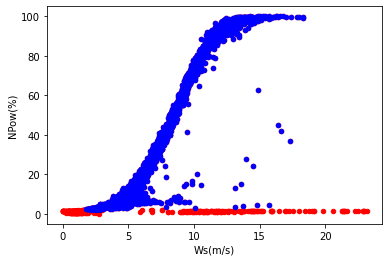

In [303]:
ax=df.plot(kind='scatter',x='Ws',y='NPow(%)',color='red')
df3.plot(ax=ax, kind='scatter',x='Ws',y='NPow(%)',color='blue')
ax.set_xlabel("Ws(m/s)")
ax.set_ylabel("NPow(%)")
#ax.left_ax.set_ylabel('Variance of log wages')
#plt.legend(loc='best')

plt.show()

In [304]:

# model normal behaviour so curtailment should not be considered


#cluster filter is applied on the training data and aims to remove outliers depending on the operating conditions 
#of the wind turbine.
#A multivariate outlier detection approach based on Mahalanobis distance is used in 
#This paper utilizes agglomerative hierarchical clustering (Rokach & Maimon, 2005)

#used in the linkage function which determines how the objects in the data set should be grouped into clusters that form a binary hierarchical cluster tree.

#A probability threshold of 2.5% is chosen

In [305]:


print(df3.columns)
df4=df3[['date_num', 'Ws', 'Pow', 'Temp', 'Pressure']]
print(df4.columns)

#The distance is calculated in the Euclidean space and the inner squared distance is computed using Ward’s algorithm
#The distance is calculated for each data vector in the training data set from its cluster centre


Index(['date_num', 'Ws', 'Pow', 'Temp', 'Pressure', 'NPow(%)'], dtype='object')
Index(['date_num', 'Ws', 'Pow', 'Temp', 'Pressure'], dtype='object')


In [306]:
df4.describe()


,date_num,Ws,Pow,Temp,Pressure
count,3952.000000,3952.000000,3952.000000,3898.000000,3898.000000
mean,734884.478220,7.078841,790.306057,3.496633,981.844409
std,9.005456,3.085873,743.848479,2.440402,11.968703
min,734869.000000,1.821097,10.138330,-2.180700,936.090027
25%,734876.616319,4.576938,117.458776,1.627327,974.352264
50%,734884.989583,6.521796,488.904800,3.362340,983.518005
75%,734892.126736,9.323606,1420.521484,5.230392,991.213242
max,734899.993056,18.339830,2302.708008,9.993120,1001.919983


In [307]:
df4.shape[0]

3952

In [308]:
import numpy as np
from scipy.cluster import hierarchy 
from scipy.spatial import distance

X = df4.iloc[:, [2,3]].values
#Power and Temperature ranges
#print(df4.iloc[:, [2,3]])
y = distance.pdist(X, metric="euclidean")
y[np.isnan(y)] = 1

out = hierarchy.linkage(y,method='ward')

children = out[:, :2].astype(np.int)
row_clusters=linkage(pdist(children,metric='euclidean'),method='ward')
print(children.shape)

(3951, 2)


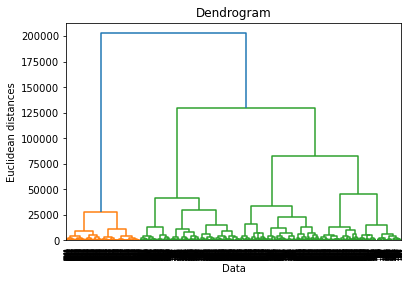

In [309]:
import scipy.cluster.hierarchy as sch
try:
    dendrogram = sch.dendrogram(sch.linkage(children, method  = "ward"))
    plt.title('Dendrogram')
    plt.xlabel('Data')
    plt.ylabel('Euclidean distances')
    plt.show()
except:
  print("An exception occurred")
    

In [310]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters =3, affinity = 'euclidean', linkage ='ward')

In [311]:
y_hc=hc.fit_predict(children)

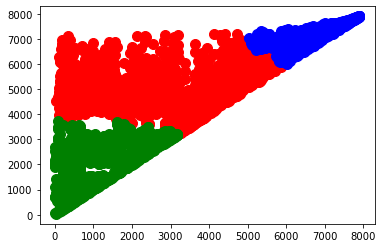

In [312]:
X=children
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')


#plt.title('Clusters of Customers (Hierarchical Clustering Model)')
#plt.xlabel('Pow')
#plt.ylabel('Temp')
#plt.show()

In [313]:

def findCordinateCenter(xList,yList,coordinates):
    xCenter= np.sum(xList)/len(xList)
    yCenter= np.sum(yList)/len(yList)
    coordinates.append(xCenter)
    coordinates.append(yCenter)
    return coordinates

In [314]:
#Cluster1 X[y_hc==0, 0],X[y_hc==0, 1]
a=X[y_hc==0, 0]
b=X[y_hc==0, 1]
print(len(a))


1894


In [315]:
df16= pd.DataFrame({'Pow': a, 'Temp':b})

In [316]:
coordinatesCenter=[]
C1=findCordinateCenter(df16['Pow'],df16['Temp'],coordinatesCenter)
print(C1)

[3024.708025343189, 5009.414994720169]


In [317]:
C1=np.array(C1)
C1=C1.reshape(1,- 1)

In [318]:
import numpy as np

def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False


def MahalanobisDist(data,verbose=False):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            vars_mean = []
            for i in range(data.shape[0]):
                vars_mean.append(list(data.mean(axis=0)))
            
            diff = data - vars_mean
            md = []
            for i in range(len(diff)):
                md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))

            if verbose:
                print("Covariance Matrix:\n {}\n".format(covariance_matrix))
                print("Inverse of Covariance Matrix:\n {}\n".format(inv_covariance_matrix))
                print("Variables Mean Vector:\n {}\n".format(vars_mean))
                print("Variables - Variables Mean Vector:\n {}\n".format(diff))
                print("Mahalanobis Distance:\n {}\n".format(md))
            return md
        else:
            print("2 Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("1 Error: Covariance Matrix is not positive definite!")

In [319]:
data=df16
data1=df16[['Temp','Pow']]

list_df=data1.to_numpy()

result=MahalanobisDist(list_df,verbose=False)
#print(result)
    

In [320]:
df16.describe()

,Pow,Temp
count,1894.000000,1894.000000
mean,3024.708025,5009.414995
std,1579.273919,894.070592
min,18.000000,3248.000000
25%,1769.250000,4242.250000
50%,3220.500000,4990.500000
75%,4347.750000,5723.750000
max,5874.000000,7206.000000


In [321]:
df1_c=df4[(df4['Pow']>=df16['Pow'].min())&(df4['Pow']<=df16['Pow'].max())]

In [322]:
df1_c.describe()

,date_num,Ws,Pow,Temp,Pressure
count,3893.000000,3893.000000,3893.000000,3839.000000,3839.000000
mean,734884.369065,7.149882,802.069688,3.531885,981.716236
std,8.992590,3.054040,743.254057,2.438166,11.946724
min,734869.000000,2.004207,18.105000,-2.180700,936.090027
25%,734876.513889,4.658667,122.694099,1.657165,974.293488
50%,734884.923611,6.611962,518.131714,3.454170,983.346008
75%,734891.958333,9.359699,1434.233032,5.270040,991.037506
max,734899.993056,18.339830,2302.708008,9.993120,1001.919983


In [323]:
data=df1_c[(df4['Temp']>=0)]
data1=data[['Pow','Temp']]

list_df=data1.to_numpy()

result=MahalanobisDist(list_df,verbose=False)
#print(result)

<ipython-input-323-5d9dc437ca56>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=df1_c[(df4['Temp']>=0)]


In [324]:
data.shape

(3595, 5)

In [325]:
df4.shape

(3952, 5)

In [326]:
print(len(result))

3595


In [327]:
data['dist']=result

<ipython-input-327-a1ffde6da0a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dist']=result


In [328]:
num_tot=data['date_num'].sum()
print(num_tot)

2641907224.9375


In [329]:
data['Pd(%)'] =(data['dist']*data['date_num']*100)/num_tot

<ipython-input-329-d81983a4ecdc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Pd(%)'] =(data['dist']*data['date_num']*100)/num_tot


In [330]:
data.describe()

,date_num,Ws,Pow,Temp,Pressure,dist,Pd(%)
count,3595.000000,3595.000000,3595.000000,3595.000000,3595.000000,3595.000000,3595.000000
mean,734883.789969,7.341070,848.016158,3.807868,981.104310,1.312315,0.036504
std,8.905089,3.062122,747.917522,2.266819,11.944894,0.526641,0.014649
min,734869.000000,2.004207,18.105000,0.000646,936.090027,0.036372,0.001012
25%,734876.010417,4.821453,136.363953,1.956565,973.770508,0.971243,0.027016
50%,734884.611111,6.967305,621.407715,3.783980,982.377991,1.296589,0.036066
75%,734891.434028,9.503250,1503.536499,5.442430,990.402985,1.656994,0.046092
max,734899.868056,18.339830,2302.708008,9.993120,1001.140015,3.297938,0.091735


In [331]:
data['Pd(%)'].max()

0.09173527681256759

In [332]:
#Cluster2 X[y_hc==1, 0],X[y_hc==1, 1]
c=X[y_hc==1, 0]
d=X[y_hc==1, 1]
print(len(c))

863


In [333]:
df18= pd.DataFrame({'Pow': c, 'Temp':d})

In [334]:
coordinatesCenter=[]
C2=findCordinateCenter(df18['Pow'],df18['Temp'],coordinatesCenter)
print(C2)

[6777.542294322132, 7152.311703360371]


In [335]:
C2=np.array(C2)
C2=C2.reshape(1,- 1)

In [336]:
data2=df18
data2=df18[['Temp','Pow']]

list_df2=data2.to_numpy()

result2=MahalanobisDist(list_df2,verbose=False)
#print(result)

In [337]:
df18.describe()

,Pow,Temp
count,863.000000,863.000000
mean,6777.542294,7152.311703
std,673.433845,459.125893
min,5037.000000,6020.000000
25%,6235.500000,6801.500000
50%,6767.000000,7195.000000
75%,7374.000000,7534.000000
max,7899.000000,7901.000000


In [338]:
df2_c=df4[(df4['Pow']<=df18['Pow'].max())]

In [339]:
df2_c.describe()

,date_num,Ws,Pow,Temp,Pressure
count,3952.000000,3952.000000,3952.000000,3898.000000,3898.000000
mean,734884.478220,7.078841,790.306057,3.496633,981.844409
std,9.005456,3.085873,743.848479,2.440402,11.968703
min,734869.000000,1.821097,10.138330,-2.180700,936.090027
25%,734876.616319,4.576938,117.458776,1.627327,974.352264
50%,734884.989583,6.521796,488.904800,3.362340,983.518005
75%,734892.126736,9.323606,1420.521484,5.230392,991.213242
max,734899.993056,18.339830,2302.708008,9.993120,1001.919983


In [340]:
data2=df2_c[(df4['Temp']>=0)]
data3=data2[['Pow','Temp']]

list_df2=data3.to_numpy()

result2=MahalanobisDist(list_df2,verbose=False)

In [341]:
data2['dist']=result2

<ipython-input-341-d70b724ef4b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['dist']=result2


In [342]:
num_tot2=data2['date_num'].sum()
print(num_tot2)

2678651847.4375005


In [343]:
data2['Pd(%)'] =(data2['dist']*data2['date_num']*100)/num_tot2

<ipython-input-343-582a4374ed74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Pd(%)'] =(data2['dist']*data2['date_num']*100)/num_tot2


In [344]:
data2.describe()

,date_num,Ws,Pow,Temp,Pressure,dist,Pd(%)
count,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000
mean,734883.908762,7.272698,836.578275,3.776209,981.237354,1.311627,0.035984
std,8.933130,3.095980,749.075581,2.270072,11.978783,0.528357,0.014495
min,734869.000000,1.821097,10.138330,0.000646,936.090027,0.032251,0.000885
25%,734876.097222,4.737313,129.126404,1.916840,973.822998,0.965711,0.026494
50%,734884.687500,6.901833,599.739990,3.722590,982.544006,1.289146,0.035368
75%,734891.597222,9.476461,1494.094971,5.418560,990.765991,1.649154,0.045245
max,734899.868056,18.339830,2302.708008,9.993120,1001.140015,3.318287,0.091035


In [345]:
data2['Pd(%)'].max()

0.09103516559275826

In [346]:
#Cluster3 X[y_hc==2, 0],X[y_hc==2, 1]
l=X[y_hc==2, 0]
m=X[y_hc==2, 1]

In [347]:
df20= pd.DataFrame({'Pow': l, 'Temp':m})

In [348]:
coordinatesCenter=[]
C3=findCordinateCenter(df20['Pow'],df20['Temp'],coordinatesCenter)
print(C3)

[1166.8693467336684, 2165.42378559464]


In [349]:
C3=np.array(C3)
C3=C3.reshape(1,- 1)

In [350]:
data4=df20
data5=df20[['Pow','Temp']]

list_df3=data3.to_numpy()

result3=MahalanobisDist(list_df3,verbose=False)
#print(result)

In [351]:
df20.describe()

,Pow,Temp
count,1194.000000,1194.000000
mean,1166.869347,2165.423786
std,810.707688,905.686444
min,0.000000,33.000000
25%,520.250000,1413.000000
50%,1021.500000,2346.000000
75%,1727.750000,2887.500000
max,3181.000000,3742.000000


In [352]:
df3_c=df4[(df4['Pow']>=df20['Pow'].min())&(df4['Pow']<=df20['Pow'].max())]

In [353]:
df3_c.describe()

,date_num,Ws,Pow,Temp,Pressure
count,3952.000000,3952.000000,3952.000000,3898.000000,3898.000000
mean,734884.478220,7.078841,790.306057,3.496633,981.844409
std,9.005456,3.085873,743.848479,2.440402,11.968703
min,734869.000000,1.821097,10.138330,-2.180700,936.090027
25%,734876.616319,4.576938,117.458776,1.627327,974.352264
50%,734884.989583,6.521796,488.904800,3.362340,983.518005
75%,734892.126736,9.323606,1420.521484,5.230392,991.213242
max,734899.993056,18.339830,2302.708008,9.993120,1001.919983


In [354]:
data4=df3_c[(df4['Temp']>=0)]
data5=data4[['Temp','Pow']]

list_df3=data5.to_numpy()

result3=MahalanobisDist(list_df3,verbose=False)

In [355]:
data4['dist']=result3

<ipython-input-355-91bb519bb4c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['dist']=result3


In [356]:
num_tot3=data4['date_num'].sum()
print(num_tot3)

2678651847.4375005


In [357]:
data4['Pd(%)'] =(data4['dist']*data4['date_num']*100)/num_tot3

<ipython-input-357-9f24bf12ae73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['Pd(%)'] =(data4['dist']*data4['date_num']*100)/num_tot3


In [358]:
data4.describe()

,date_num,Ws,Pow,Temp,Pressure,dist,Pd(%)
count,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000
mean,734883.908762,7.272698,836.578275,3.776209,981.237354,1.311627,0.035984
std,8.933130,3.095980,749.075581,2.270072,11.978783,0.528357,0.014495
min,734869.000000,1.821097,10.138330,0.000646,936.090027,0.032251,0.000885
25%,734876.097222,4.737313,129.126404,1.916840,973.822998,0.965711,0.026494
50%,734884.687500,6.901833,599.739990,3.722590,982.544006,1.289146,0.035368
75%,734891.597222,9.476461,1494.094971,5.418560,990.765991,1.649154,0.045245
max,734899.868056,18.339830,2302.708008,9.993120,1001.140015,3.318287,0.091035


In [365]:
min_threshold=0.025

In [366]:
df_res=pd.concat([data,data2,data4])

In [371]:
df_res1=df_res[df_res['Pd(%)']>min_threshold]

In [372]:
df_res.shape[0]

10885

In [373]:
df_res1.shape[0]

8468

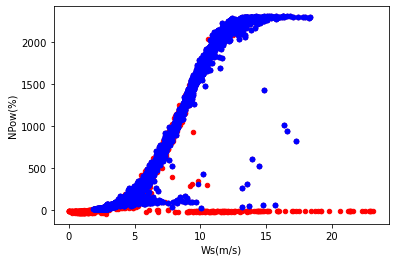

In [374]:
ax=df.plot(kind='scatter',x='Ws',y='Pow',color='red')
df_res1.plot(ax=ax, kind='scatter',x='Ws',y='Pow',color='blue')
ax.set_xlabel("Ws(m/s)")
ax.set_ylabel("NPow(%)")
#ax.left_ax.set_ylabel('Variance of log wages')
#plt.legend(loc='best')

plt.show()

In [ ]:
#improving: find the definite sub block for each df, modify the mahalanobis function to calculate the distances 
#from the cluster centers

In [68]:
import numpy as np


def create_data(examples=50, features=5, upper_bound=10, outliers_fraction=0.1, extreme=False):
    '''
    This method for testing (i.e. to generate a 2D array of data)
    '''
    data = []
    magnitude = 4 if extreme else 3
    for i in range(examples):
        if (examples - i) <= round((float(examples) * outliers_fraction)):
            data.append(np.random.poisson(upper_bound ** magnitude, features).tolist())
        else:
            data.append(np.random.poisson(upper_bound, features).tolist())
    return np.array(data)


def MahalanobisDist(data, verbose=False):
    print(data.shape)
    covariance_matrix = np.cov(data, rowvar=False)
    print('covariance_matrix')
    print(covariance_matrix.shape)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            vars_mean = []
            for i in range(data.shape[0]):
                vars_mean.append(list(data.mean(axis=0)))
            print(type(vars_mean))
            diff = data - vars_mean
            print('diff')
            print(diff)
            md = []
            for i in range(len(diff)):
                md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))

            if verbose:
                print("Covariance Matrix:\n {}\n".format(covariance_matrix))
                print("Inverse of Covariance Matrix:\n {}\n".format(inv_covariance_matrix))
                print("Variables Mean Vector:\n {}\n".format(vars_mean))
                print("Variables - Variables Mean Vector:\n {}\n".format(diff))
                print("Mahalanobis Distance:\n {}\n".format(md))
            return md
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")


def MD_detectOutliers(data, extreme=False, verbose=False):
    MD = MahalanobisDist(data, verbose)
    # one popular way to specify the threshold
    #m = np.mean(MD)
    #t = 3. * m if extreme else 2. * m
    #outliers = []
    #for i in range(len(MD)):
    #    if MD[i] > t:
    #        outliers.append(i)  # index of the outlier
    #return np.array(outliers)

    # or according to the 68–95–99.7 rule
    std = np.std(MD)
    k = 3. * std if extreme else 2. * std
    m = np.mean(MD)
    up_t = m + k
    low_t = m - k
    outliers = []
    for i in range(len(MD)):
        if (MD[i] >= up_t) or (MD[i] <= low_t):
            outliers.append(i)  # index of the outlier
    return np.array(outliers)


def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False


data = create_data(15, 3, 10, 0.1)
print(type(data))

print("data:\n {}\n".format(data))

x=MahalanobisDist(data, verbose=False)

#outliers_indices = MD_detectOutliers(data, verbose=True)

#print("Outliers Indices: {}\n".format(outliers_indices))
#print("Outliers:")
#for ii in outliers_indices:
 #   print(data[ii])

<class 'numpy.ndarray'>
data:
 [[  12    8   10]
 [   8   12    6]
 [   9   11    6]
 [   9   10    7]
 [   9   10   13]
 [   2   11    9]
 [  16    9   11]
 [   8   15   17]
 [  11    8    7]
 [  14   10    8]
 [   8   10   11]
 [  10   12   15]
 [  11    5   10]
 [ 977  974  969]
 [ 991 1016 1038]]

(15, 3)
covariance_matrix
(3, 3)
<class 'list'>
diff
[[-127.66666667 -133.4        -132.46666667]
 [-131.66666667 -129.4        -136.46666667]
 [-130.66666667 -130.4        -136.46666667]
 [-130.66666667 -131.4        -135.46666667]
 [-130.66666667 -131.4        -129.46666667]
 [-137.66666667 -130.4        -133.46666667]
 [-123.66666667 -132.4        -131.46666667]
 [-131.66666667 -126.4        -125.46666667]
 [-128.66666667 -133.4        -135.46666667]
 [-125.66666667 -131.4        -134.46666667]
 [-131.66666667 -131.4        -131.46666667]
 [-129.66666667 -129.4        -127.46666667]
 [-128.66666667 -136.4        -132.46666667]
 [ 837.33333333  832.6         826.53333333]
 [ 851.3333333